In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

data = pd.read_csv('data.csv')

In [13]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

1.General Customer Answer

Calculate the descriptive statistics for the tenure, MonthlyCharges, and TotalCharges
columns. By comparing the mean and median of tenure, how would you describe the
company's "typical" customer?

In [17]:
data['TotalCharges'] = data['TotalCharges'].str.replace(" ", "0")
data['TotalCharges'] = data['TotalCharges'].str.replace("", "0")
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [19]:
cols = ['tenure','MonthlyCharges', 'TotalCharges']

for col in cols:
    print(f"Descriptive statistics from {col}")
    print(f"Mean {np.mean(data[col])}")
    print(f"Median {np.median(data[col])}")
    print(f"Mode {statistics.mode(data[col])}")
    print(f"Range {data[col].max()-data[col].min()}")
    print(f"Variance {np.var(data[col])}")
    print(f"Standard Deviation {np.std(data[col])}")
    print(f"Interquartile Range {data[col].quantile([0.25, 0.75])}")
    print("-------------------------")



Descriptive statistics from tenure
Mean 32.37114865824223
Median 29.0
Mode 1
Range 72
Variance 603.0824673302961
Standard Deviation 24.55773742286321
Interquartile Range 0.25     9.0
0.75    55.0
Name: tenure, dtype: float64
-------------------------
Descriptive statistics from MonthlyCharges
Mean 64.76169246059918
Median 70.35
Mode 20.05
Range 100.5
Variance 905.2823796146374
Standard Deviation 30.08791085493703
Interquartile Range 0.25    35.50
0.75    89.85
Name: MonthlyCharges, dtype: float64
-------------------------
Descriptive statistics from TotalCharges
Mean 18947571.766933553
Median 10309040.0505
Mode 2000.02
Range 80608040.08
Variance 487922179516577.6
Standard Deviation 22088960.580266733
Interquartile Range 0.25    3.090801e+05
0.75    3.070807e+07
Name: TotalCharges, dtype: float64
-------------------------


2. Distribution Visualization

Generate histograms for the tenure and MonthlyCharges columns. Describe the shape of
each distribution. Are they symmetric, skewed? What interesting patterns or peaks do you
observe?

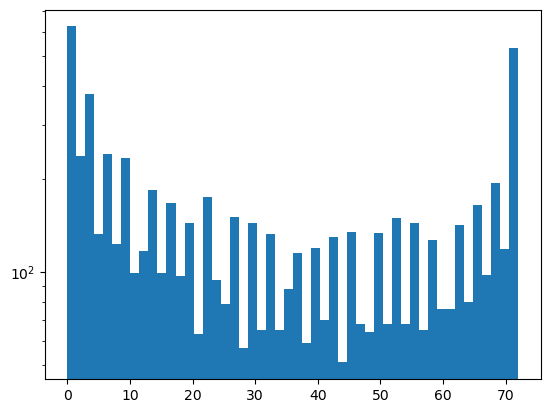

In [20]:
plt.hist(data['tenure'], bins=50, log=True)
plt.show()

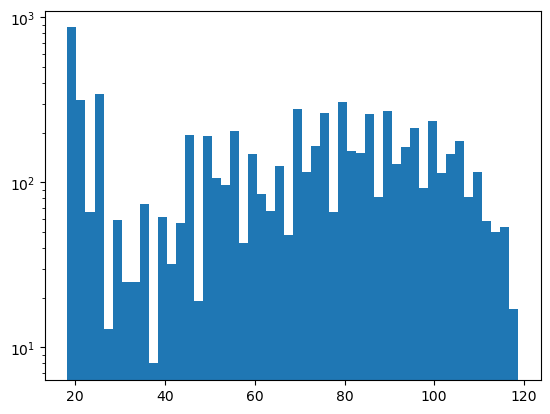

In [21]:
plt.hist(data['MonthlyCharges'], bins=50, log=True)
plt.show()

3. Segment Analysis (Churn vs. No Churn)

Group the data by the Churn column and calculate the median for tenure and
MonthlyCharges for each group. What key differences do you notice?

In [22]:
median_by_churn = data.groupby('Churn')[['tenure', 'MonthlyCharges']].median()

for index, row in median_by_churn.iterrows():
    print(f"Grupo Churn = {index}:")
    print(f"  Mediana de tenure: {row['tenure']} meses")
    print(f"  Mediana de MonthlyCharges: ${row['MonthlyCharges']:.2f}")
    print("-" * 30)

Grupo Churn = No:
  Mediana de tenure: 38.0 meses
  Mediana de MonthlyCharges: $64.43
------------------------------
Grupo Churn = Yes:
  Mediana de tenure: 10.0 meses
  Mediana de MonthlyCharges: $79.65
------------------------------


Create a box plot that compares the distribution of MonthlyCharges between customers
who churned (Churn='Yes') and those who did not (Churn='No'). What insight does the
chart give you

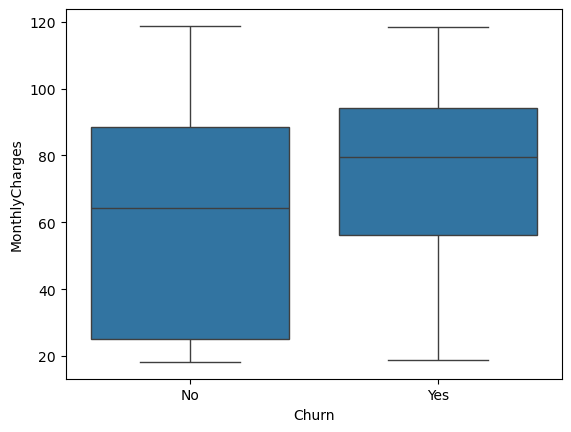

In [24]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')
plt.show()